# Bibliotecas Para Visualização de Dados em Python

Prof. Tiago Dias

[Linkedin](https://www.linkedin.com/in/diasctiago/) | [Github](https://github.com/diasctiago) | [Blog](https://www.dadosaocubo.com/)

### Documentações

1. [Documentação Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html)
2. [Documentação Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
3. [Documentação Plotly Express](https://plotly.com/python-api-reference/plotly.express.html)
4. [Documentação Boreh](https://docs.bokeh.org/en/latest/docs/user_guide.html)
5. [Documentação Altair](https://altair-viz.github.io/getting_started/starting.html)





### Instalação Bibliotecas

In [ ]:
# Instalando a biblioteca
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#!pip install plotly
#!pip install boreh
#!pip install altair

### Importanto Bibliotecas

In [ ]:
# importando a biblioteca
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import altair as alt

output_notebook()

### Resolvendo Problemas com Gráficos

| ![pubi](https://drive.google.com/uc?id=12s3WH2lazCfJNkEhPH12y7kwzbs7U6Fp) |
|:--:| 
| **Figura 1** – _Fluxo de pensamento para gerar gráficos_ (Fonte da imagem: do autor) |

#### Base de Dados

In [ ]:
# base de dados de carros
mpg = sns.load_dataset('mpg')
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [ ]:
# base de dados de voos
flights = sns.load_dataset('flights')
flights.head(2)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118


#### Configuração Gráficos Matplotlib

In [ ]:
# tamanho do gráfico
plt.rcParams['figure.figsize'] = (4,4)
# tamanho da legenda eixo x
plt.rcParams['xtick.labelsize'] = 10
# tamanho da legenda eixo y
plt.rcParams['ytick.labelsize'] = 10
# tamanho da fonte do gráfico
plt.rcParams['font.size'] = 10
# tamanho do título
plt.rcParams['axes.titlesize'] = 10

#### Gráfico de Barras

* Comparativo entre dados categóricos
* Comparativos mensais e anuais
* Exemplo: Comparar o total de vendas por estado

In [ ]:
 # quantidade de carro por origem
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

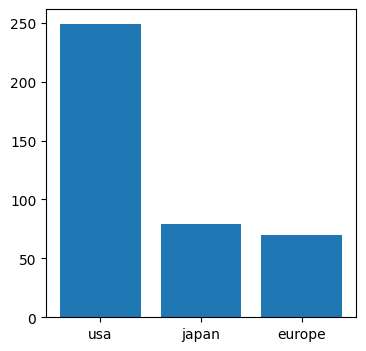

In [ ]:
# matplotlib
xbar = mpg['origin'].value_counts().index
ybar = mpg['origin'].value_counts().values
plt.bar(xbar,ybar)
plt.show()

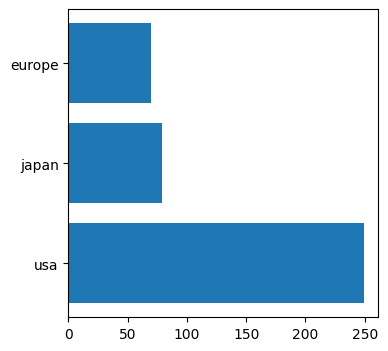

In [ ]:
plt.barh(xbar,ybar)
plt.show()

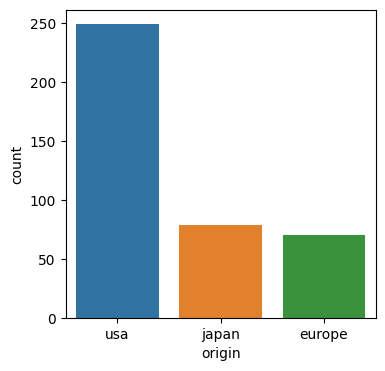

In [ ]:
# seaborn
sns.countplot(data=mpg, 
              x='origin');

In [ ]:
# plotly
px.bar(data_frame=mpg, 
       x='origin', 
       width=400, height=400)

In [ ]:
px.bar(data_frame=mpg, 
       x='origin', 
       color='origin',
       width=400, height=400)

In [ ]:
# boreh
country = list(mpg['origin'].value_counts().index)
counts = mpg['origin'].value_counts().values

p = figure(x_range=country, width=400, height=400)
p.vbar(x=country, top=counts, width=0.9)
show(p)

In [ ]:
# boreh
country = list(mpg['origin'].value_counts().index)
counts = mpg['origin'].value_counts().values

p = figure(y_range=country, width=400, height=400)
p.hbar(y=country, left=0, right=counts, height=0.9)
show(p)

In [ ]:
# altair
alt.Chart(mpg).mark_bar().encode(
    x='origin',
    y='count()')

alt.Chart(...)

In [ ]:
# altair
alt.Chart(mpg).mark_bar().encode(
    y='origin',
    x='count()')

alt.Chart(...)

#### Gráfico de Linhas

* Evolução de um atributo no tempo
* Demonstrar sequência de um valor durante anos, meses, semanas ou dias
* Exemplo: Vendas durante os meses de um determinado ano


In [ ]:
# evolução de voos por mês ao longo dos anos
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights_pivot = flights.pivot('year', 'month', 'passengers')
flights_pivot

<ipython-input-34-1c8e11562c7c>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


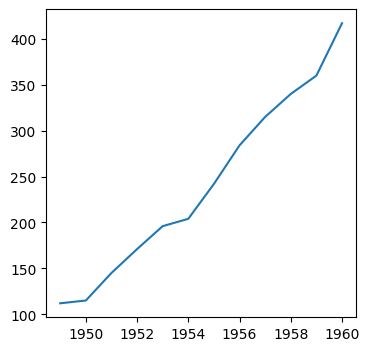

In [ ]:
# matplotlib
xline = flights_pivot.index
yline = flights_pivot.Jan
plt.plot(xline, yline)
plt.show()

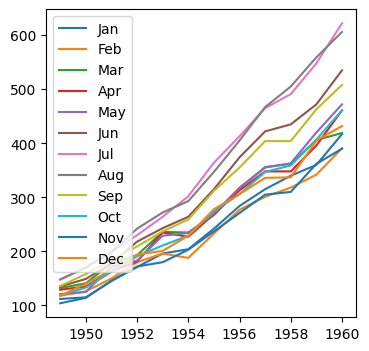

In [ ]:
# matplotlib
for m in flights.month.unique():
  xline = flights_pivot[m].index
  yline = flights_pivot[m].values
  plt.plot(xline, yline, label=m)
plt.legend()
plt.show()

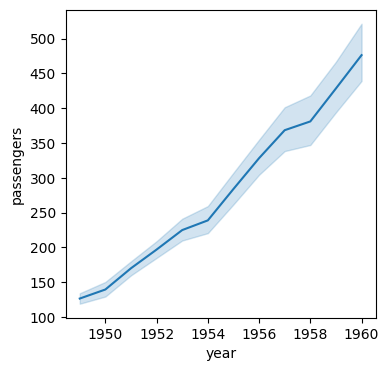

In [ ]:
# seaborn
sns.lineplot(data=flights,
             x='year',
             y='passengers');

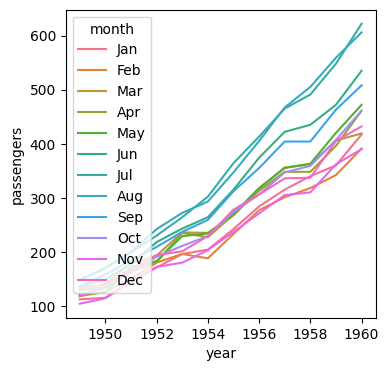

In [ ]:
# seaborn
sns.lineplot(data=flights,
             x='year',
             y='passengers',
             hue='month',
             estimator=sum);

In [ ]:
# plotly
px.line(data_frame=flights,
        x='year',
        y='passengers',
        width=400,
        height=400)

In [ ]:
# plotly
px.line(data_frame=flights,
        x='year',
        y='passengers',
        line_group='month',
        color='month',
        width=400,
        height=400)

In [ ]:
# boreh
p = figure(width=400, height=400)
p.vline_stack(['Jan','Feb','Mar',
               'Apr','May','Jun',
               'Jul','Aug','Sep',
               'Oct','Nov','Dec'], 
              color=['black','blue','green',
                     'red','pink','brown',
                     'gray','yellow','purple',
                     'orange','navy','firebrick'],
              x='year', 
              source=flights_pivot)
show(p)

In [ ]:
# altair
alt.Chart(flights).mark_line(interpolate='monotone').encode(
    x='year',
    y='passengers',
    color='month')

alt.Chart(...)

#### Gráfico de Área

* Similar ao gráfico de linha
* Evidencia uma noção de proporção sobre o todo com a área desenhada
* Exemplo: Desconto em compras por meses


In [ ]:
# evolução de voos por mês ao longo dos anos
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


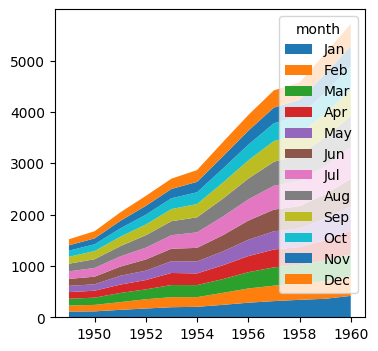

In [ ]:
# matplotlib
plt.stackplot(flights_pivot.index,
              flights_pivot['Jan'],
              flights_pivot['Feb'],
              flights_pivot['Mar'],
              flights_pivot['Apr'],
              flights_pivot['May'],
              flights_pivot['Jun'],
              flights_pivot['Jul'],
              flights_pivot['Aug'],
              flights_pivot['Sep'],
              flights_pivot['Oct'],
              flights_pivot['Nov'],
              flights_pivot['Dec'],
              labels=['Jan','Feb','Mar','Apr','May','Jun',
                      'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='month')
plt.show()

In [ ]:
# plotly
px.area(data_frame=flights,
        x='year',
        y='passengers',
        width=400, height=400)

In [ ]:
# plotly
px.area(data_frame=flights,
        x='year',
        y='passengers',
        line_group='month',
        color='month',
        width=400, height=400)

In [ ]:
# boreh
p = figure(width=400, height=400)
p.varea_stack(['Jan','Feb','Mar',
               'Apr','May','Jun',
               'Jul','Aug','Sep',
               'Oct','Nov','Dec'], 
              color=['black','blue','green',
                     'red','pink','brown',
                     'gray','yellow','purple',
                     'orange','navy','firebrick'],
              x='year', 
              source=flights_pivot)
show(p)

In [ ]:
# altair
alt.Chart(flights).mark_area(opacity=0.3).encode(
    x='year',
    y='passengers',
    color='month')

alt.Chart(...)

#### Gráfico de Dispersão

* Visão de comparação entre duas variáveis
* Indica o quantos uma variável pode ou não influenciar a outra
* Exemplo: Tempo de profissão e salário

In [ ]:
# potência x aceleração dos carros
mpg[['horsepower', 'acceleration']].head(3)

,horsepower,acceleration
0,130.0,12.0
1,165.0,11.5
2,150.0,11.0


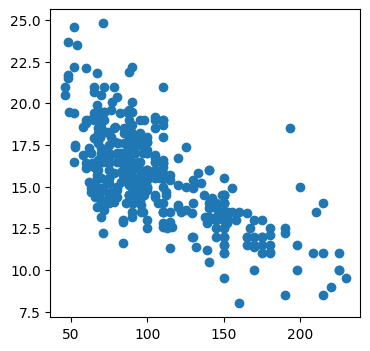

In [ ]:
# matplotlib
xscatter = mpg['horsepower']
yscatter = mpg.acceleration
plt.scatter(xscatter, yscatter)
plt.show()

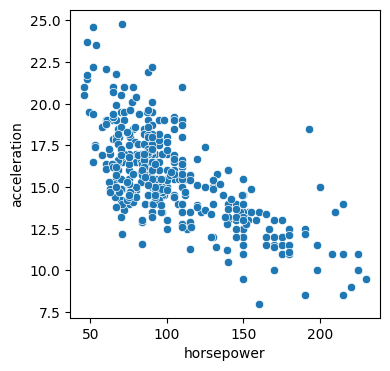

In [ ]:
# seaborn
sns.scatterplot(data=mpg,
                x='horsepower',
                y='acceleration');

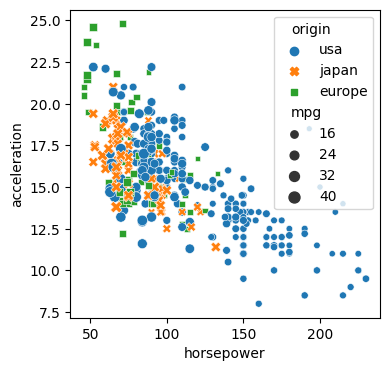

In [ ]:
sns.scatterplot(data=mpg,
                x='horsepower',
                y='acceleration',
                hue='origin',
                style='origin',
                size='mpg');

In [ ]:
# plotly
px.scatter(data_frame=mpg,
           x='horsepower',
           y='acceleration',
           width=400, height=400)

In [ ]:
# plotly
px.scatter(data_frame=mpg,
           x='horsepower',
           y='acceleration', 
           color='origin',
           symbol='origin',
           size='mpg',
           width=400, height=400)

In [ ]:
# boreh
p = figure(width=400, height=400)
p.scatter(x='horsepower',
          y='acceleration',
          source=mpg)
show(p)

In [ ]:
# altair
alt.Chart(mpg).mark_point().encode(
    x='horsepower',
    y='acceleration')

alt.Chart(...)

#### Gráfico de Pizza

* Visão de um atributo comparado com o todo
* É o valor relativo de cada categoria analizada
* Exemplo: Proporção de vendas por produto


In [ ]:
# percentual de carros por origem
round(mpg['origin'].value_counts()/len(mpg)*100,1)

usa       62.6
japan     19.8
europe    17.6
Name: origin, dtype: float64

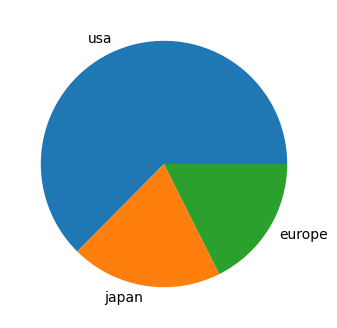

In [ ]:
# matplotlib
valores_pie = mpg['origin'].value_counts().values
sabores_pie = mpg['origin'].value_counts().index
plt.pie(valores_pie, labels=sabores_pie)
plt.show()

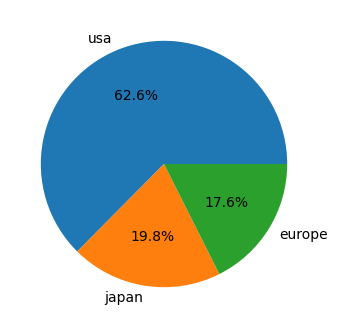

In [ ]:
# matplotlib
valores_pie = mpg['origin'].value_counts().values
sabores_pie = mpg['origin'].value_counts().index
plt.pie(valores_pie, labels=sabores_pie, autopct='%1.1f%%')
plt.show()

In [ ]:
# plotly
px.pie(data_frame=mpg,
       names='origin',
       width=400, height=400)

In [ ]:
# bokeh
from bokeh.transform import cumsum

data = mpg['origin'].value_counts().reset_index(name='value').rename(columns={'index': 'country'})
data['angle'] = data['value']/data['value'].sum() * 2*3.14159265359
data['color'] = ['blue','green','red']

p = figure(width=400, height=400)

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data)

show(p)

In [ ]:
# altair
alt.Chart(mpg).mark_arc().encode(
    theta='count()',
    color='origin'
)

alt.Chart(...)

#### Gráfico de Caixa

* Visão de distribuição de uma variável
* Identificação de outliers
* Apresenta algumas respostas importantes sobre o dado em análise
* Exemplo: A distribuição dos salários em uma empresa

In [ ]:
# dispersão dos dados de potência dos carros
mpg.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [ ]:
mpg.horsepower.min(), mpg.horsepower.max()

(46.0, 230.0)

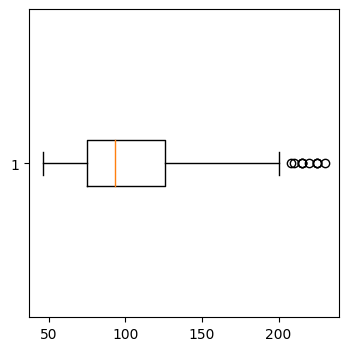

In [ ]:
# matplolib
plt.boxplot(mpg.dropna().horsepower, vert=False)
plt.show()

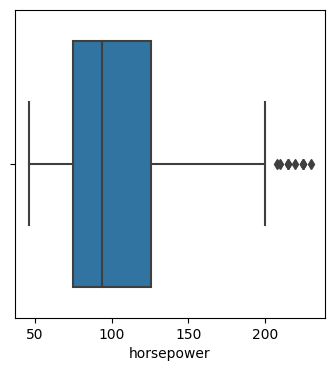

In [ ]:
# seaborn
sns.boxplot(data=mpg, 
            x='horsepower');

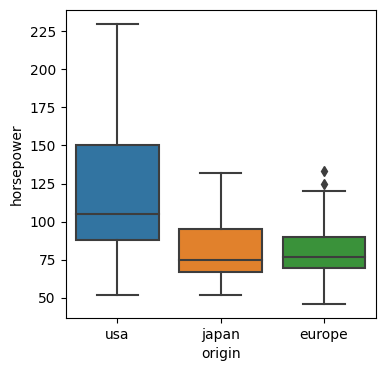

In [ ]:
sns.boxplot(data=mpg, 
            y='horsepower',
            x='origin');

In [ ]:
# plotly
px.box(data_frame=mpg,
       x='horsepower',
       width=400,height=400)

In [ ]:
# plotly
px.box(data_frame=mpg,
       y='horsepower',
       x='origin',
       width=400,height=400)

In [ ]:
# altair
alt.Chart(mpg).mark_boxplot().encode(
    x='horsepower')

alt.Chart(...)

#### Histograma

* Visão de distribuição de uma variável
* Analisa a frequência/quantidade de uma coluna
* Similar ao gráfico de coluna, mas busca responder perguntas sobre a distribuição
* Exemplo: Faixa etária dos inscritos no enem 

In [ ]:
# verificando o aceleração dos carros
mpg['acceleration']

0      12.0
1      11.5
2      11.0
3      12.0
4      10.5
       ... 
393    15.6
394    24.6
395    11.6
396    18.6
397    19.4
Name: acceleration, Length: 398, dtype: float64

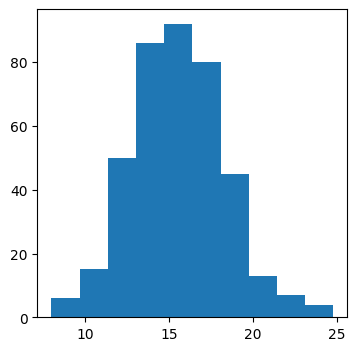

In [ ]:
# matplotlib
plt.hist(mpg['acceleration'])
plt.show()

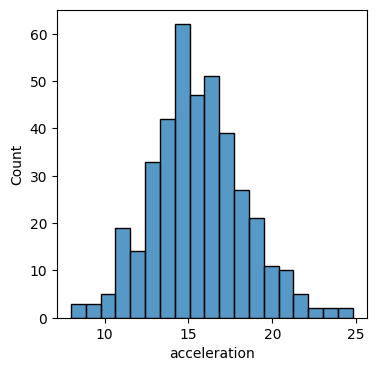

In [ ]:
# seaborn
sns.histplot(data=mpg, 
             x='acceleration');

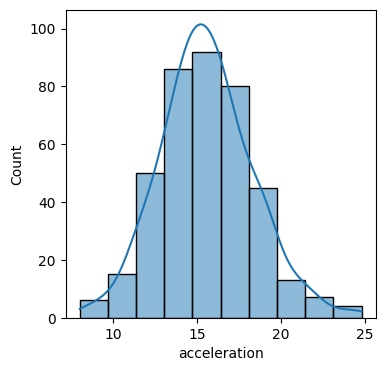

In [ ]:
sns.histplot(data=mpg, 
             x='acceleration', 
             bins=10,
             kde=True);

In [ ]:
# plotly
px.histogram(data_frame=mpg,
             x='acceleration',
             width=400,height=400)

In [ ]:
# plotly
px.histogram(data_frame=mpg,
             x='acceleration',
             color='origin',
             nbins=10,
             width=400,height=400)

In [ ]:
# altair
alt.Chart(mpg).mark_bar().encode(
    alt.X("acceleration", bin=True),
    y='count()')

alt.Chart(...)

#### Mapa de Calor


<ipython-input-71-0837c7ae265e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



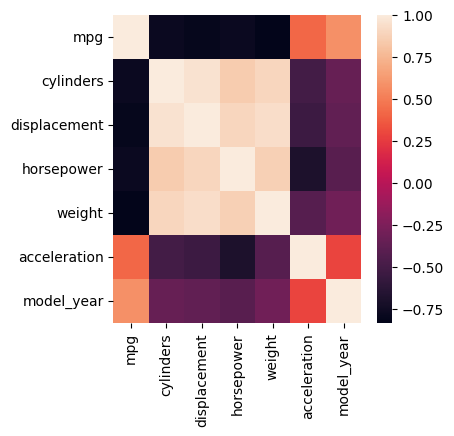

In [ ]:
# seaborn
sns.heatmap(mpg.corr());

<ipython-input-102-1e262fb42c92>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



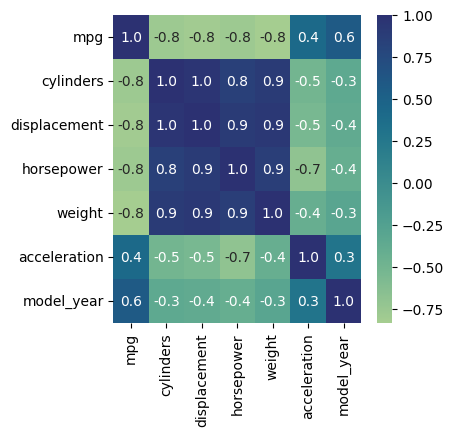

In [ ]:
sns.heatmap(mpg.corr(),
            annot=True,
            fmt=".1f",
            cmap="crest");

In [ ]:
# plotly
px.density_heatmap(data_frame=mpg, 
                   x='mpg',
                   y='horsepower',
                   width=400,height=400)

In [ ]:
# plotly
px.density_heatmap(data_frame=mpg, 
                   x='mpg',
                   y='horsepower',
                   text_auto=True,
                   width=400,height=400)